In [1]:
using CSV
using DataFrames

include("../lib/Comparison.jl")
using .Comparison

In [2]:
### Parameters ###
prm = LorPrm1D(2.0, 0.0001, 10.0) # Lorentzian parameters
ang =  CouplAng1D(π/2, 0.0) # Coupling angles
nSta = Lev1D(100) # Number of RC levels
nDyn = Lev1D(10) # Number of RC levels
T = 1 # Temperature

1

In [3]:
ρSta = ρMFGS(prm, ang, nSta, T);

In [5]:
ti, tf, dt = [0 15000 200];
tspan = (ti, tf);
t = ti:dt:tf;

In [6]:
ρDyn = dsolve(prm, ang, nDyn, T, tspan);

In [7]:
using LinearAlgebra

In [8]:
square(n) = n*n;

### Identity Matrices ###
𝕀(n) = Matrix(I, n, n) ;
𝕀s = 𝕀(2) # Spin;

In [9]:
fidelity(ρ1, ρ2) = square(tr(sqrt(sqrt(ρ1)*ρ2*sqrt(ρ1))))

fidelity (generic function with 1 method)

In [14]:
comp_list = [real(fidelity(ρSta, ptrace(ρDyn(i), 10))) for i in t]

76-element Vector{Float64}:
 0.49999999999999645
 0.9760239083197139
 0.9081733526004445
 0.8681600104877407
 0.9620735297544298
 0.9503945816914421
 0.9467315325848468
 0.9482724802369255
 0.9852623685582113
 0.9793382766879909
 0.9585292828612706
 0.9956748769283346
 0.9838224267817426
 ⋮
 0.9999702584668201
 0.9999865881921645
 0.9999693203816935
 0.9999898114645518
 0.9999803730688622
 0.9999842442418714
 0.999993232580374
 0.9999819909504722
 0.9999949648535685
 0.9999904576745341
 0.9999897247864116
 0.9999970541359812

In [15]:
df = DataFrame(hcat(t, comp_list), :auto)
CSV.write("C://Users//crh222//Data//fidelity.csv",  df, header = ["T", "fid"])

"C://Users//crh222//Data//fidelity.csv"

In [1]:
import numpy as np
import numpy.random as rn
import matplotlib
import matplotlib.pyplot as plt
import proplot as pplt
import pandas as pd

In [2]:
data = np.array(pd.read_csv(r'C://Users//crh222//Data//fidelity.csv'))

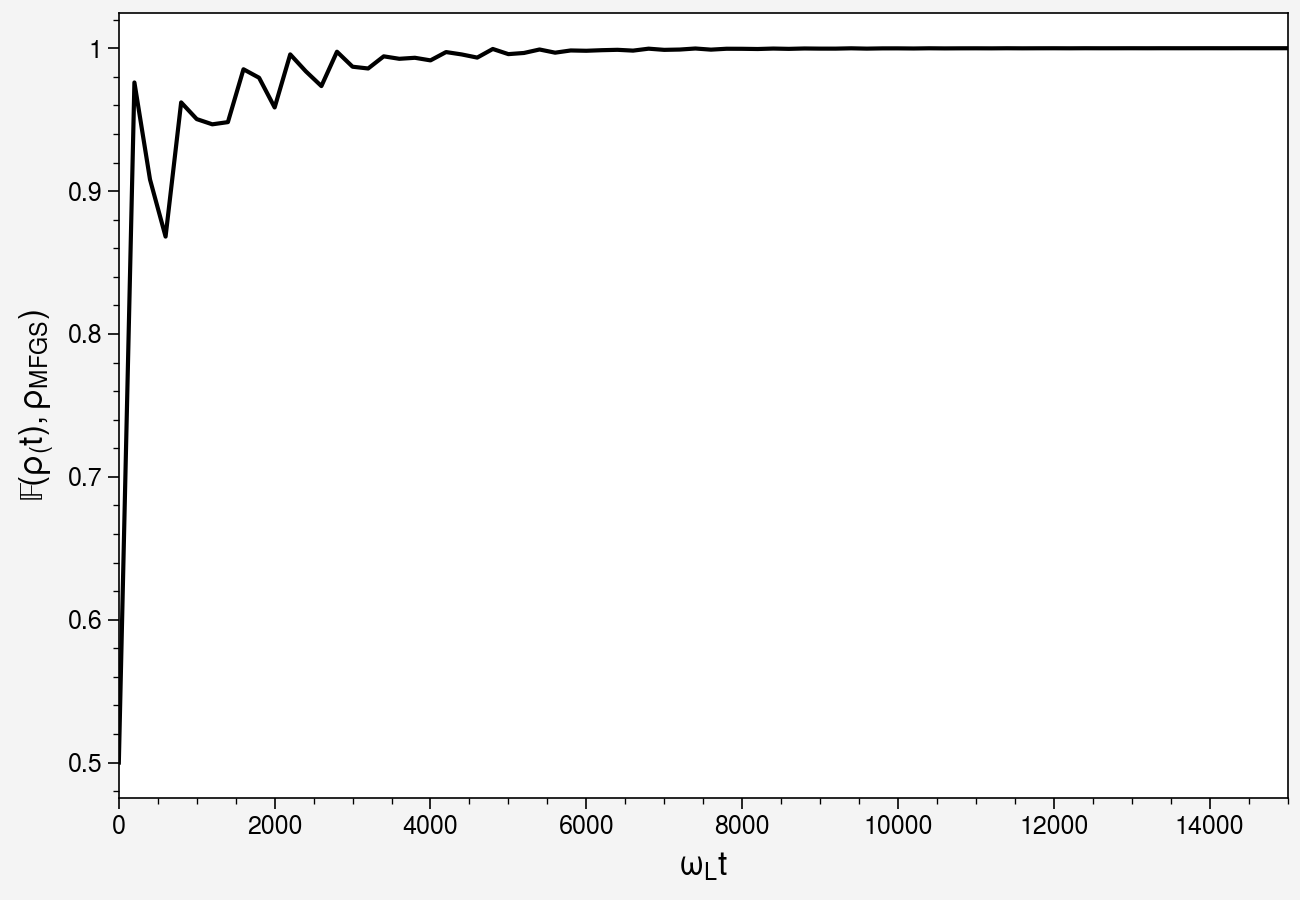

In [5]:
fig, ax = pplt.subplots(figsize=(6.5, 4.5))  #size in inches

ax.set_xlabel("$\omega_L t$", fontsize=12)
ax.set_ylabel("$\mathbb{F}(\\rho_(t), \\rho_{\\rm{MFGS}})$", fontsize=12)

##### Data ######

ax.plot(data[:,0], data[:,1], 'k-')
ax.grid(False)
##### Plot ######
# plt.title('Steady-State Magnetisations at Angle $\\theta$ from z-Axis (Prm. A)')

plt.savefig("C://Users//crh222//Dropbox//PhD//1. RC Mapping//Graphs//Fidelity_1D_x_prma_10020.pdf", dpi=300)